In [3]:
#import modul
import pandas as pd
import re
import sqlite3

load data sentimen

In [194]:
#load data sentimen
sentimen = pd.read_csv('train_preprocess.tsv.txt', sep="\t", names=["teks", "label"])
sentimen

,teks,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


cleansing

In [131]:
#perintah cleansning
def cleansing(teks):
     string = teks.lower() #mengubah huruf kapital menjadi huruf kecil
     string = re.sub(r'\burl\b', '', string) #menghilangkan kata URL 
     string = re.sub(r'\\[^\s]+', '', string) #menghilankan kata yang dimulai dengan \
     #string = re.sub(r'rt|wk|[^\w\s]', '', string) #menghilangkan kata wkwkwkw
     string = re.sub(r'[^a-zA-Z0-9]', ' ', string) #remove selain huruf
     #string = re.sub(r'rt|user|[^\w\s]', '', string) #remove kata usename dan dan kata selanjutnya
     string = re.sub(r'\d', '', string) # remove number
     string = re.sub(r'\b\w\b', '', string) #menghilangkan huruf tunggal
     string = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', string) #remove link url
     string = re.sub('  +', ' ', string) # Remove extra space
     string = re.sub(r'[^\w\s]', '', string)
     return string

In [130]:
#melihat hasil cleansing
sentimen = pd.read_csv('train_preprocess.tsv.txt', sep="\t", names=["teks", "label"])
sentimen = sentimen['teks'].apply(cleansing)
sentimen

0        warung ini dimiliki oleh pengusaha pabrik tahu...
1        mohon ulama lurus dan mmbri hujjah partai apa ...
2        lokasi strategis di jalan sumatera bandung tem...
3        betapa bahagia nya diri ini saat unboxing pake...
4        duh jadi mahasiswa jangan sombong dong kasih k...
                               ...                        
10995                                         tidak kecewa
10996    enak rasa masakan nya apalagi kepiting yang me...
10997          hormati partai partai yang telah berkoalisi
10998    pagi pagi di tol pasteur sudah macet parah bik...
10999    meskipun sering belanja ke yogya di riau junct...
Name: teks, Length: 11000, dtype: object

In [132]:
#membuat kolom hasil cleansing
sentimen = pd.read_csv('train_preprocess.tsv.txt', sep="\t", names=["teks", "label"])
sentimen['teks cleansing'] = sentimen['teks'].apply(cleansing)
sentimen

,teks,label,teks cleansing
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan mmbri hujjah partai apa ...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...
...,...,...,...
10995,tidak kecewa,positive,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati partai partai yang telah berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bik...


In [133]:
sentimen = sentimen.drop('teks', axis=1)
sentimen

,label,teks cleansing
0,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,neutral,mohon ulama lurus dan mmbri hujjah partai apa ...
2,positive,lokasi strategis di jalan sumatera bandung tem...
3,positive,betapa bahagia nya diri ini saat unboxing pake...
4,negative,duh jadi mahasiswa jangan sombong dong kasih k...
...,...,...
10995,positive,tidak kecewa
10996,positive,enak rasa masakan nya apalagi kepiting yang me...
10997,neutral,hormati partai partai yang telah berkoalisi
10998,negative,pagi pagi di tol pasteur sudah macet parah bik...


In [135]:
sentimen = sentimen[['teks cleansing', 'label']]
sentimen

,teks cleansing,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan mmbri hujjah partai apa ...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai partai yang telah berkoalisi,neutral
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [136]:
sentimen.isna

<bound method DataFrame.isna of                                           teks cleansing     label
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1      mohon ulama lurus dan mmbri hujjah partai apa ...   neutral
2      lokasi strategis di jalan sumatera bandung tem...  positive
3      betapa bahagia nya diri ini saat unboxing pake...  positive
4      duh jadi mahasiswa jangan sombong dong kasih k...  negative
...                                                  ...       ...
10995                                       tidak kecewa  positive
10996  enak rasa masakan nya apalagi kepiting yang me...  positive
10997        hormati partai partai yang telah berkoalisi   neutral
10998  pagi pagi di tol pasteur sudah macet parah bik...  negative
10999  meskipun sering belanja ke yogya di riau junct...  positive

[11000 rows x 2 columns]>

In [137]:
sentimen.isna().sum()

teks cleansing    0
label             0
dtype: int64

In [138]:
sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   teks cleansing  11000 non-null  object
 1   label           11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [139]:
sentimen.shape

(11000, 2)

In [140]:
sentimen.duplicated().sum()

68

In [141]:
sentimen = sentimen.drop_duplicates()

In [142]:
sentimen.duplicated().sum()

0

In [143]:
sentimen.shape

(10932, 2)

In [144]:
sentimen.to_csv('sentimen.csv')


In [145]:
sentimen = pd.read_csv('sentimen.csv')
conn = sqlite3.connect('sentimen.db')
print('jika ok')

jika ok


In [146]:
sentimen.to_sql ('data_baru', conn, index=False, if_exists='append')
conn.commit()

gambaran data

In [147]:
from wordcloud import WordCloud

In [148]:
sentimen

,Unnamed: 0,teks cleansing,label
0,0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,1,mohon ulama lurus dan mmbri hujjah partai apa ...,neutral
2,2,lokasi strategis di jalan sumatera bandung tem...,positive
3,3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...,...
10927,10993,demokrat dorong upaya kemandirian energi nasi...,neutral
10928,10994,tidak bosan,positive
10929,10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10930,10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [149]:
sentimen = sentimen.drop('Unnamed: 0', axis=1)
sentimen

,teks cleansing,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan mmbri hujjah partai apa ...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
10927,demokrat dorong upaya kemandirian energi nasi...,neutral
10928,tidak bosan,positive
10929,enak rasa masakan nya apalagi kepiting yang me...,positive
10930,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [150]:
from wordcloud import WordCloud

In [151]:
count_label = sentimen.groupby('label').label.count()
count_label

label
negative    3412
neutral     1137
positive    6383
Name: label, dtype: int64

<Axes: ylabel='label'>

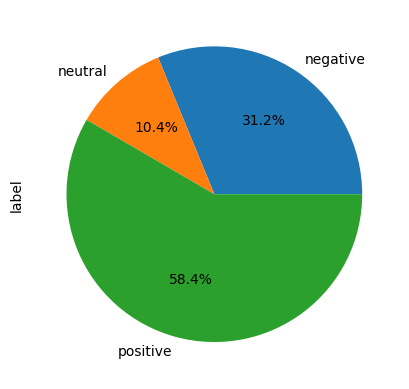

In [183]:
count_label.plot(kind='pie', autopct='%1.1f%%')

In [189]:
text = ' '.join(sentimen['teks cleansing'])
wordcloud = WordCloud().generate(text)

In [190]:
import matplotlib.pyplot as plt

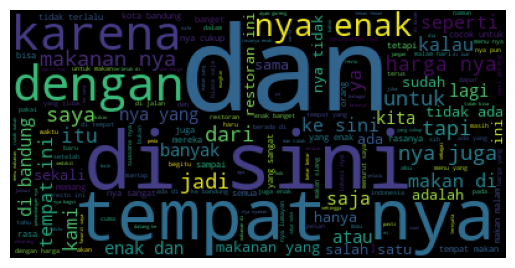

In [193]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

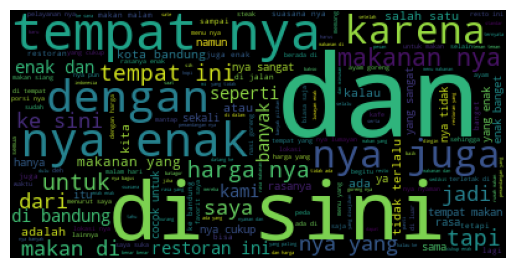

In [195]:
text_positive = ' '.join(sentimen['teks cleansing'][sentimen.label=="positive"])
wordcloud_positive = WordCloud().generate(text_positive)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()

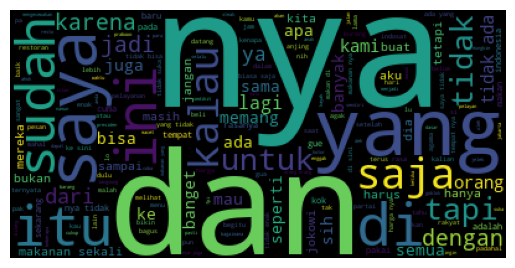

In [196]:
text_negative = ' '.join(sentimen['teks cleansing'][sentimen.label=="negative"])
wordcloud_negative = WordCloud().generate(text_negative)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.show()

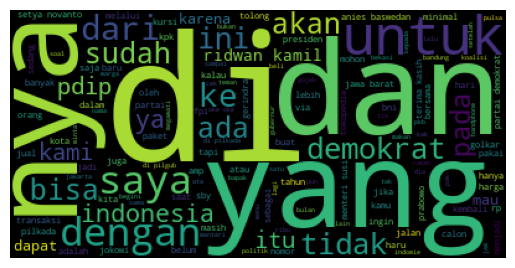

In [197]:
text_neutral = ' '.join(sentimen['teks cleansing'][sentimen.label=="neutral"])
wordcloud_neutral = WordCloud().generate(text_neutral)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.show()

In [198]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [199]:
sentimen['Teks_Token'] = sentimen['teks cleansing'].apply(word_tokenize_wrapper)
sentimen

,teks cleansing,label,Teks_Token
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,"[warung, ini, dimiliki, oleh, pengusaha, pabri..."
1,mohon ulama lurus dan mmbri hujjah partai apa ...,neutral,"[mohon, ulama, lurus, dan, mmbri, hujjah, part..."
2,lokasi strategis di jalan sumatera bandung tem...,positive,"[lokasi, strategis, di, jalan, sumatera, bandu..."
3,betapa bahagia nya diri ini saat unboxing pake...,positive,"[betapa, bahagia, nya, diri, ini, saat, unboxi..."
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative,"[duh, jadi, mahasiswa, jangan, sombong, dong, ..."
...,...,...,...
10927,demokrat dorong upaya kemandirian energi nasi...,neutral,"[demokrat, dorong, upaya, kemandirian, energi,..."
10928,tidak bosan,positive,"[tidak, bosan]"
10929,enak rasa masakan nya apalagi kepiting yang me...,positive,"[enak, rasa, masakan, nya, apalagi, kepiting, ..."
10930,pagi pagi di tol pasteur sudah macet parah bik...,negative,"[pagi, pagi, di, tol, pasteur, sudah, macet, p..."


In [208]:
from nltk.corpus import stopwords

In [213]:

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'g', 'nggak', 'nda', 'ke', 'pas', 'dan',
                       'dengan', 'di', 'sini'])

list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

sentimen["Text_Remove_Stopwords"]= sentimen['Teks_Token'].apply(stopwords_removal)

sentimen["Text_Remove_Stopwords"]=sentimen["Text_Remove_Stopwords"].str.join(sep=" ")

sentimen

,teks cleansing,label,Teks_Token,Text_Remove_Stopwords
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,"[warung, ini, dimiliki, oleh, pengusaha, pabri...",warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan mmbri hujjah partai apa ...,neutral,"[mohon, ulama, lurus, dan, mmbri, hujjah, part...",mohon ulama lurus mmbri hujjah partai diwlh su...
2,lokasi strategis di jalan sumatera bandung tem...,positive,"[lokasi, strategis, di, jalan, sumatera, bandu...",lokasi strategis jalan sumatera bandung nyaman...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,"[betapa, bahagia, nya, diri, ini, saat, unboxi...",betapa bahagia unboxing paket barang bagus men...
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative,"[duh, jadi, mahasiswa, jangan, sombong, dong, ...",duh mahasiswa sombong kasih kartu kuning belaj...
...,...,...,...,...
10927,demokrat dorong upaya kemandirian energi nasi...,neutral,"[demokrat, dorong, upaya, kemandirian, energi,...",demokrat dorong upaya kemandirian energi nasional
10928,tidak bosan,positive,"[tidak, bosan]",bosan
10929,enak rasa masakan nya apalagi kepiting yang me...,positive,"[enak, rasa, masakan, nya, apalagi, kepiting, ...",enak masakan kepiting menyenangkan memilih kep...
10930,pagi pagi di tol pasteur sudah macet parah bik...,negative,"[pagi, pagi, di, tol, pasteur, sudah, macet, p...",pagi pagi tol pasteur macet parah jengkel


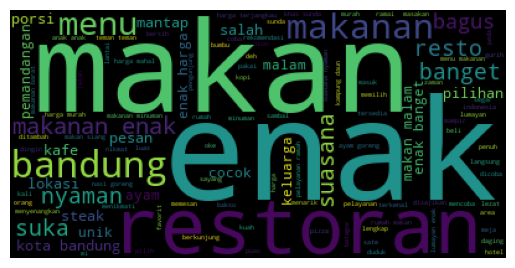

In [215]:
text_positive = ' '.join(sentimen['Text_Remove_Stopwords'][sentimen.label=="positive"])
wordcloud_positive = WordCloud().generate(text_positive)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()

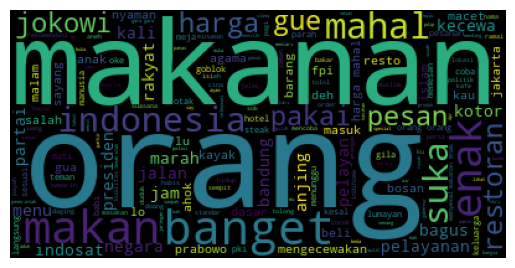

In [216]:
text_positive = ' '.join(sentimen['Text_Remove_Stopwords'][sentimen.label=="negative"])
wordcloud_positive = WordCloud().generate(text_positive)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()

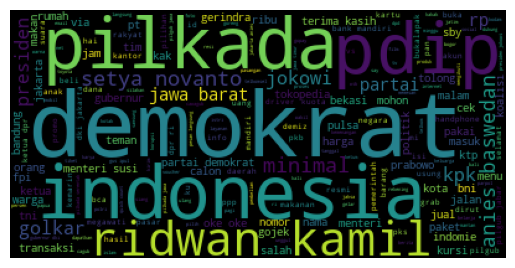

In [217]:
text_positive = ' '.join(sentimen['Text_Remove_Stopwords'][sentimen.label=="neutral"])
wordcloud_positive = WordCloud().generate(text_positive)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()